In [9]:
# Description
# Background & Context

# The Thera bank recently saw a steep decline in the number of users of their credit card, 
# credit cards are a good source of income for banks because of different kinds of fees charged by the banks 
# like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others.
# Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

# Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ 
# and identify the customers who will leave their credit card services and reason for same – so that bank could improve 
# upon those areas

# You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve 
# their services so that customers do not renounce their credit cards

# Objective

# Explore and visualize the dataset.
# Build a classification model to predict if the customer is going to churn or not
# Optimize the model using appropriate techniques
# Generate a set of insights and recommendations that will help the bank

# Data Dictionary:
# * CLIENTNUM: Client number. Unique identifier for the customer holding the account
# * Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
# * Customer_Age: Age in Years
# * Gender: Gender of the account holder
# * Dependent_count: Number of dependents
# * Education_Level: Educational Qualification of the account holder
# * Marital_Status: Marital Status of the account holder
# * Income_Category: Annual Income Category of the account holder
# * Card_Category: Type of Card
# * Months_on_book: Period of relationship with the bank
# * Total_Relationship_Count: Total no. of products held by the customer
# * Months_Inactive_12_mon: No. of months inactive in the last 12 months
# * Contacts_Count_12_mon: No. of Contacts in the last 12 months
# * Credit_Limit: Credit Limit on the Credit Card
# * Total_Revolving_Bal: Total Revolving Balance on the Credit Card
# * Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
# * Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
# * Total_Trans_Amt: Total Transaction Amount (Last 12 months)
# * Total_Trans_Ct: Total Transaction Count (Last 12 months)
# * Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
# * Avg_Utilization_Ratio: Average Card Utilization Ratio

 

In [10]:
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn import metrics
import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
)
from xgboost import XGBClassifier

In [11]:
# Perform an Exploratory Data Analysis on the data

data = pd.read_csv("BankChurners.csv")
data.head()
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [12]:

data.head()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Unnamed: 21  
0                  0.061          NaN  
1                  0.105          NaN  
2                  0.000          NaN  
3                  0.760          NaN  
4                  0.000          NaN  

[5 rows x 22 columns]

In [13]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [14]:
# Observations
# There are total 21 columns and 10,127 observations in the dataset
# We can see that 1 column Unnaned has all null values. We can safely drop this column

data.drop(["Unnamed: 21"],axis=1,inplace=True)

In [15]:
data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [16]:
# converting "objects" to "category" reduces the data space required to store the dataframe
data["Attrition_Flag"] = data["Attrition_Flag"].astype("category")
data["Gender"] = data["Gender"].astype("category")
data["Education_Level"] = data["Education_Level"].astype("category")
data["Marital_Status"] = data["Marital_Status"].astype("category")
data["Income_Category"] = data["Income_Category"].astype("category")
data["Card_Category"] = data["Card_Category"].astype("category")
         


In [17]:
data.info()
# Reduced memory usage from 1.7MB to 1.2MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   CLIENTNUM                 10127 non-null  int64   
 1   Attrition_Flag            10127 non-null  category
 2   Customer_Age              10127 non-null  int64   
 3   Gender                    10127 non-null  category
 4   Dependent_count           10127 non-null  int64   
 5   Education_Level           10127 non-null  category
 6   Marital_Status            10127 non-null  category
 7   Income_Category           10127 non-null  category
 8   Card_Category             10127 non-null  category
 9   Months_on_book            10127 non-null  int64   
 10  Total_Relationship_Count  10127 non-null  int64   
 11  Months_Inactive_12_mon    10127 non-null  int64   
 12  Contacts_Count_12_mon     10127 non-null  int64   
 13  Credit_Limit              10127 non-null  floa

In [18]:
data.describe(include="all")

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
count   1.012700e+04              10127  10127.000000  10127     10127.000000   
unique           NaN                  2           NaN      2              NaN   
top              NaN  Existing Customer           NaN      F              NaN   
freq             NaN               8500           NaN   5358              NaN   
mean    7.391776e+08                NaN     46.325960    NaN         2.346203   
std     3.690378e+07                NaN      8.016814    NaN         1.298908   
min     7.080821e+08                NaN     26.000000    NaN         0.000000   
25%     7.130368e+08                NaN     41.000000    NaN         1.000000   
50%     7.179264e+08                NaN     46.000000    NaN         2.000000   
75%     7.731435e+08                NaN     52.000000    NaN         3.000000   
max     8.283431e+08                NaN     73.000000    NaN         5.000000   

       Education_Level Marital_Status Income_Category Card_Category  \
count            10127          10127           10127         10127   
unique               7              4               6             4   
top           Graduate        Married  Less than $40K          Blue   
freq              3128           4687            3561          9436   
mean               NaN            NaN             NaN           NaN   
std                NaN            NaN             NaN           NaN   
min                NaN            NaN             NaN           NaN   
25%                NaN            NaN             NaN           NaN   
50%                NaN            NaN             NaN           NaN   
75%                NaN            NaN             NaN           NaN   
max                NaN            NaN             NaN           NaN   

        Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
count     10127.000000  ...            10127.000000           10127.000000   
unique             NaN  ...                     NaN                    NaN   
top                NaN  ...                     NaN                    NaN   
freq               NaN  ...                     NaN                    NaN   
mean         35.928409  ...                2.341167               2.455317   
std           7.986416  ...                1.010622               1.106225   
min          13.000000  ...                0.000000               0.000000   
25%          31.000000  ...                2.000000               2.000000   
50%          36.000000  ...                2.000000               2.000000   
75%          40.000000  ...                3.000000               3.000000   
max          56.000000  ...                6.000000               6.000000   

        Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
count   10127.000000         10127.000000     10127.000000   
unique           NaN                  NaN              NaN   
top              NaN                  NaN              NaN   
freq             NaN                  NaN              NaN   
mean     8631.953698          1162.814061      7469.139637   
std      9088.776650           814.987335      9090.685324   
min      1438.300000             0.000000         3.000000   
25%      2555.000000           359.000000      1324.500000   
50%      4549.000000          1276.000000      3474.000000   
75%     11067.500000          1784.000000      9859.000000   
max     34516.000000          2517.000000     34516.000000   

        Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count           10127.000000     10127.000000    10127.000000   
unique                   NaN              NaN             NaN   
top                      NaN              NaN             NaN   
freq                     NaN              NaN             NaN   
mean                0.759941      4404.086304       64.858695   
std                 0.219207      3397.129254       23.472570   
min                 0.000000       510.000000   

In [19]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [20]:
# Observations:
# Most of the observations are existing customers (not Attrited customers)
# Most of the customers are Females
# Most of the curomers are Graduates
# Most of the curomers are Married
# Most of the curomers earn Less than $40K salary
# Most of the curomers hold card of Blue category


In [21]:
data["CLIENTNUM"].nunique()


10127

In [22]:
# since ClientNum is unique for every row we can drop it
data.drop(["CLIENTNUM"],axis=1,inplace=True)

In [23]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [24]:
# There are no missing values

In [25]:
# Making a list of all catrgorical variables
cat_col = [
"Attrition_Flag",
"Gender",
"Education_Level",
"Marital_Status",
"Income_Category",
"Card_Category"
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 40)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------------
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64
----------------------------------------


In [18]:
# Observations:
# Majority of the customers are existing and not attrited
# We have slightly more female customers than male
# Most of the customers are Graduates. We have an unknown category of education
# Most of the customers are married. We have an unknown category of marital status
# Most of the customers have less than 40k salary
# Most of the customers have the Blue card


In [19]:
# Univariate analysis - 

In [20]:

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

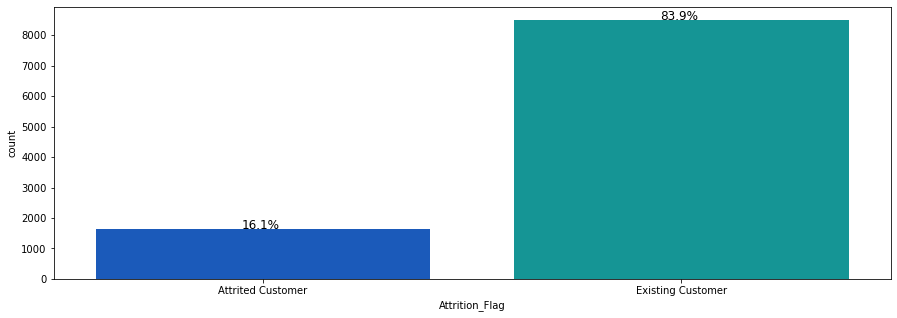

In [21]:
# Observation on Attrition : 84% customers are not attrited, ie they are existing
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Attrition_Flag"],palette='winter')
perc_on_bar(ax,data["Attrition_Flag"])


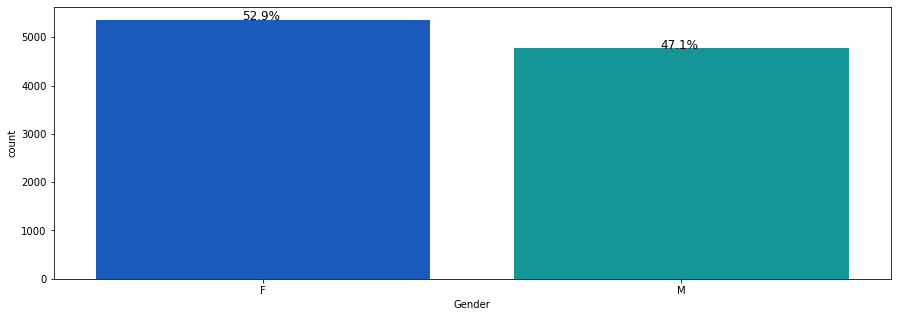

In [22]:
# Observation on Gender: Almost equal split, female customers slightly more than male
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Gender"],palette='winter')
perc_on_bar(ax,data["Gender"])


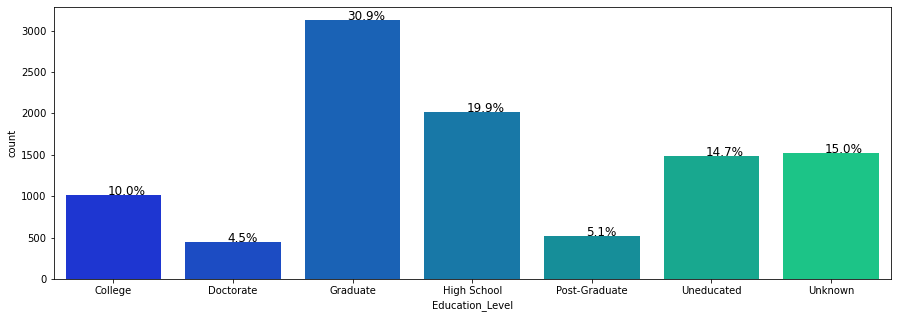

In [23]:
# Observation on Education Level: Customers with graduate degree are majority, followed by High School, Uneducated. 
# There is 15% customer base whose education level is unknown
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Education_Level"],palette='winter')
perc_on_bar(ax,data["Education_Level"])


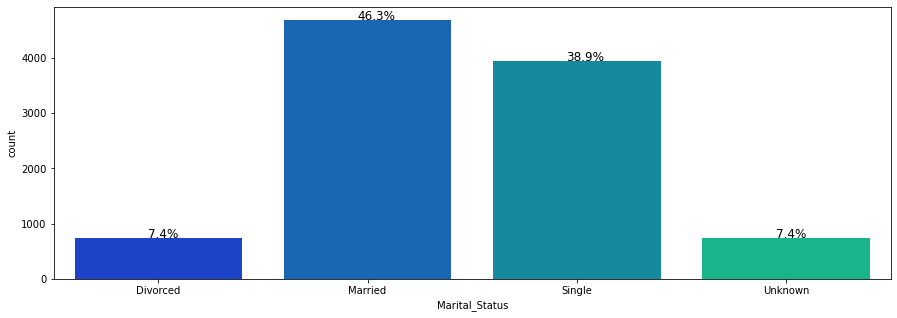

In [24]:
# Observation on Marital Status: Married customers are majority, with customers who are single next. There is a
# small percentage of customers whose marital status is unknown
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Marital_Status"],palette='winter')
perc_on_bar(ax,data["Marital_Status"])


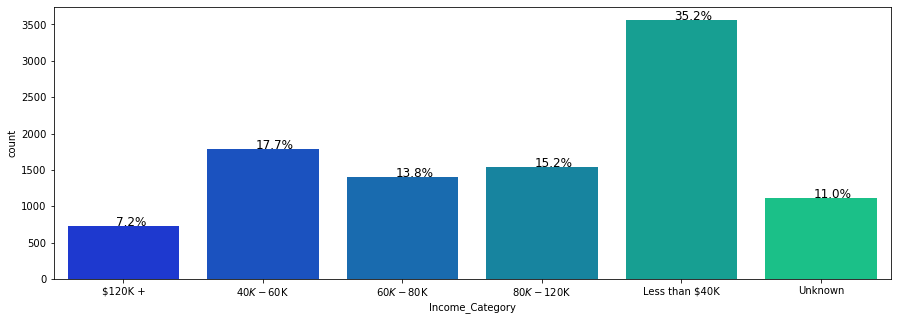

In [25]:
# Observation on Income Category: Majority of customers make less than 40k salary
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Income_Category"],palette='winter')
perc_on_bar(ax,data["Income_Category"])


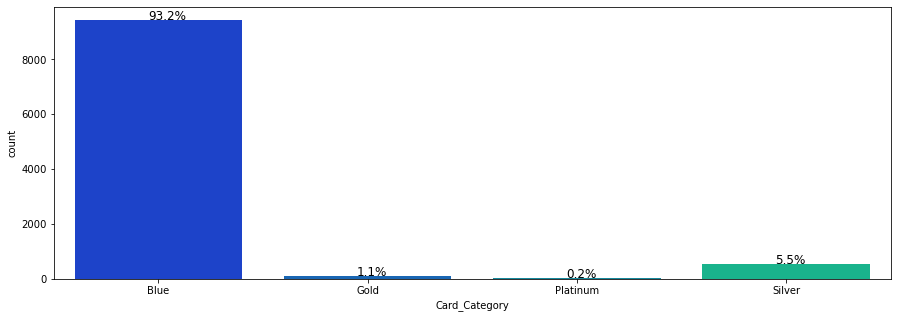

In [26]:
# Observation on Card Category : 93% of customers have blue card.
plt.figure(figsize=(15,5))
ax = sns.countplot(data["Card_Category"],palette='winter')
perc_on_bar(ax,data["Card_Category"])


In [27]:
# For numerical variables
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram

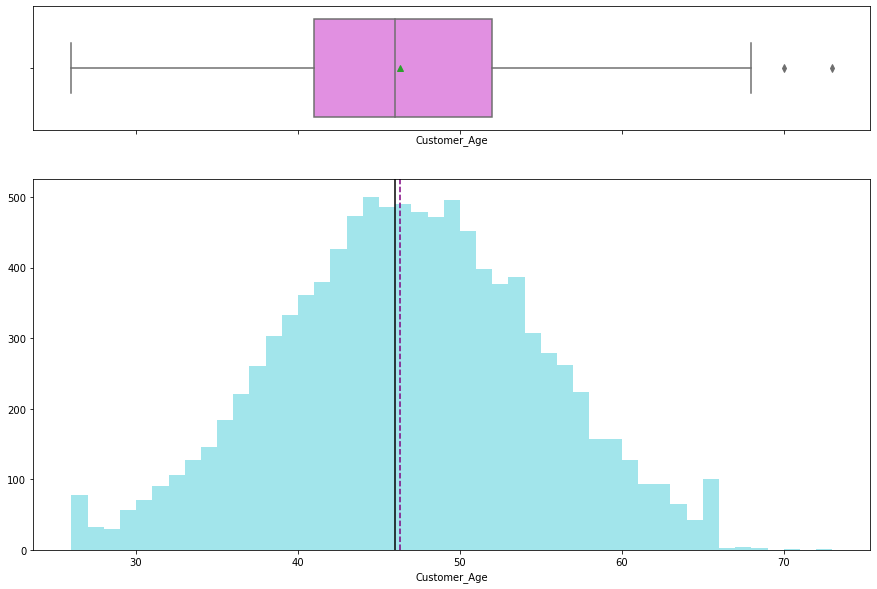

In [28]:
# Observation on Customer Age: Box plot shows normal distributed data with few outliers at the right end (higher age)
histogram_boxplot(data["Customer_Age"])

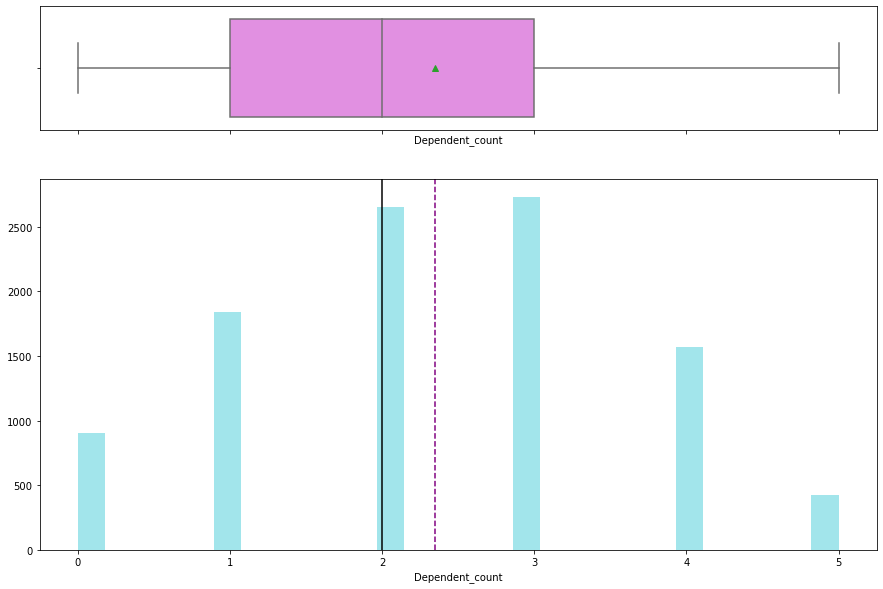

In [29]:
# Observation on dependent count: Slightly right skewed data
histogram_boxplot(data["Dependent_count"])

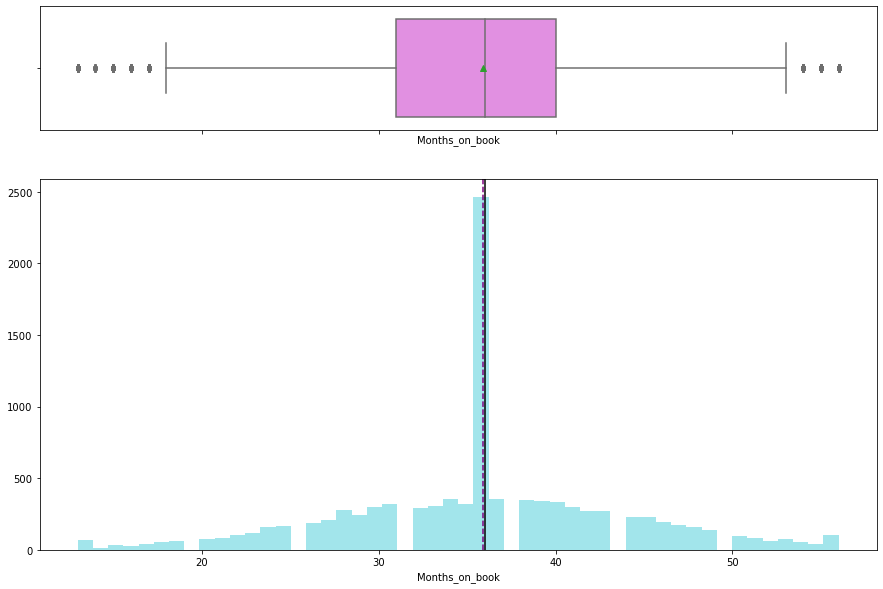

In [30]:
# Observation on Months_on_book: Normal distributed data, few outliers on both ends
histogram_boxplot(data["Months_on_book"])

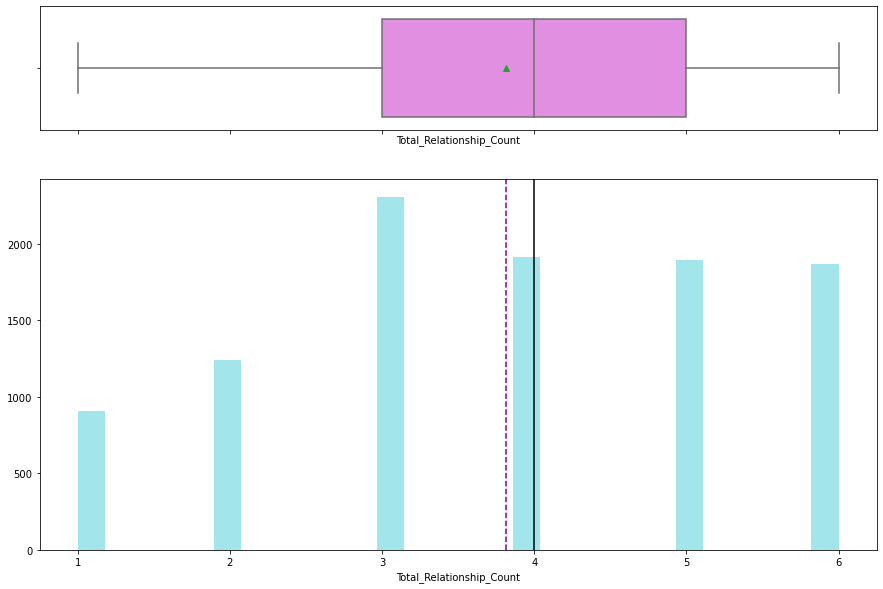

In [31]:
# Observation on Total_Relationship_Count: Left skewed data
histogram_boxplot(data["Total_Relationship_Count"])

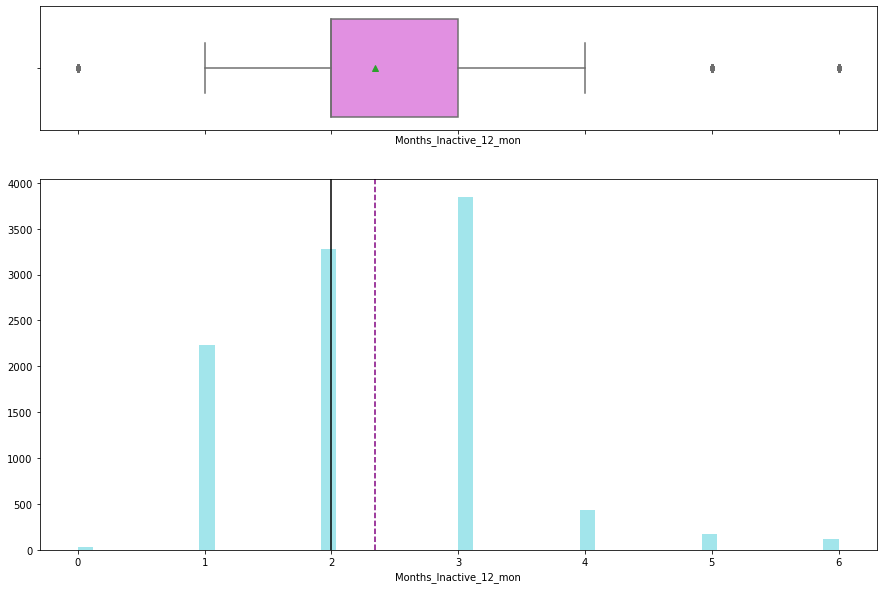

In [32]:
# Observation on Months_Inactive_12_mo: Slightly right skewed data, few outliers on both ends
histogram_boxplot(data["Months_Inactive_12_mon"])

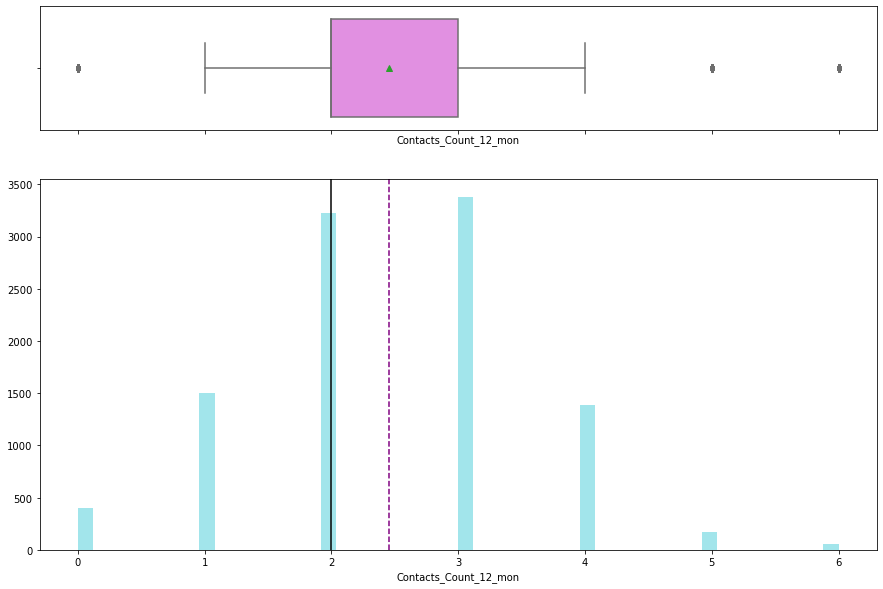

In [33]:
# Observation on Contacts_Count_12_mon: slightly right skewed data, few outliers on either ends
histogram_boxplot(data["Contacts_Count_12_mon"])

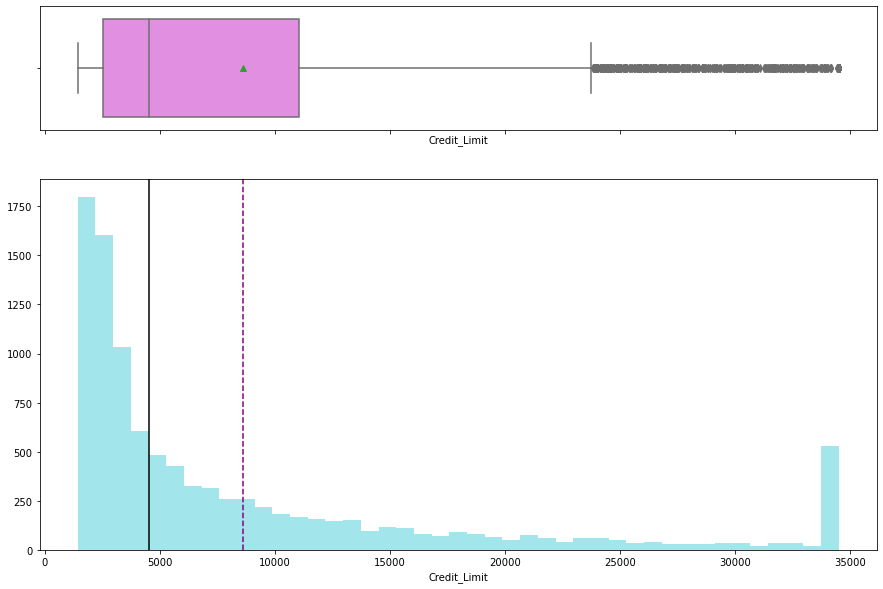

In [34]:
# Observation on Credit_Limit : Right skewed data; Many outliers on right end
histogram_boxplot(data["Credit_Limit"])

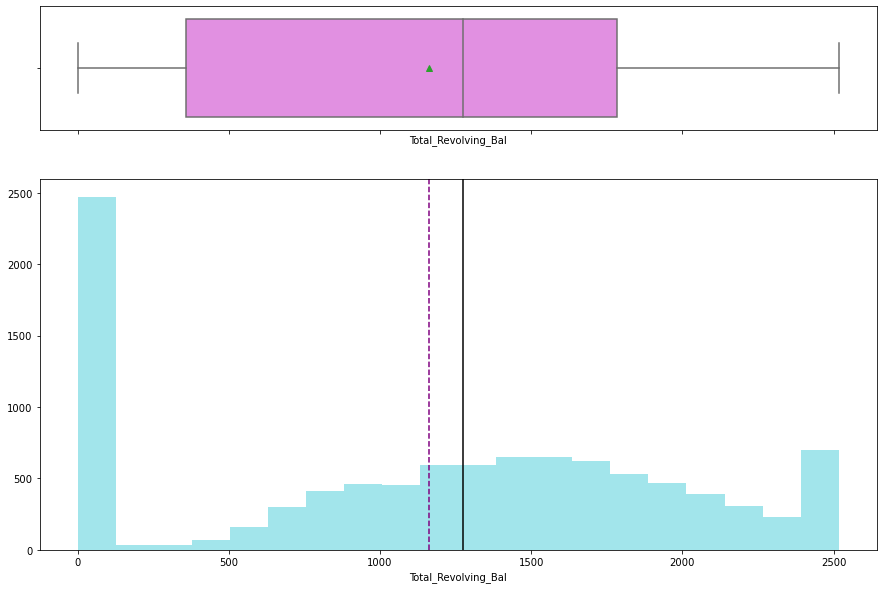

In [35]:
# Observation on Total_Revolving_Bal: Right skewed data
histogram_boxplot(data["Total_Revolving_Bal"])

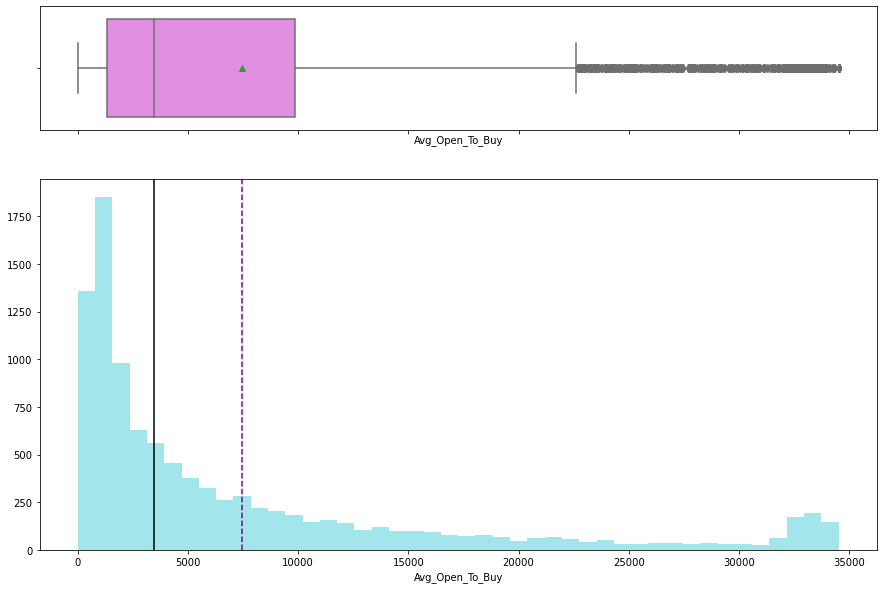

In [36]:
# Observation on Avg_Open_To_Buy : Right skewed data, many outliers on the right
histogram_boxplot(data["Avg_Open_To_Buy"])

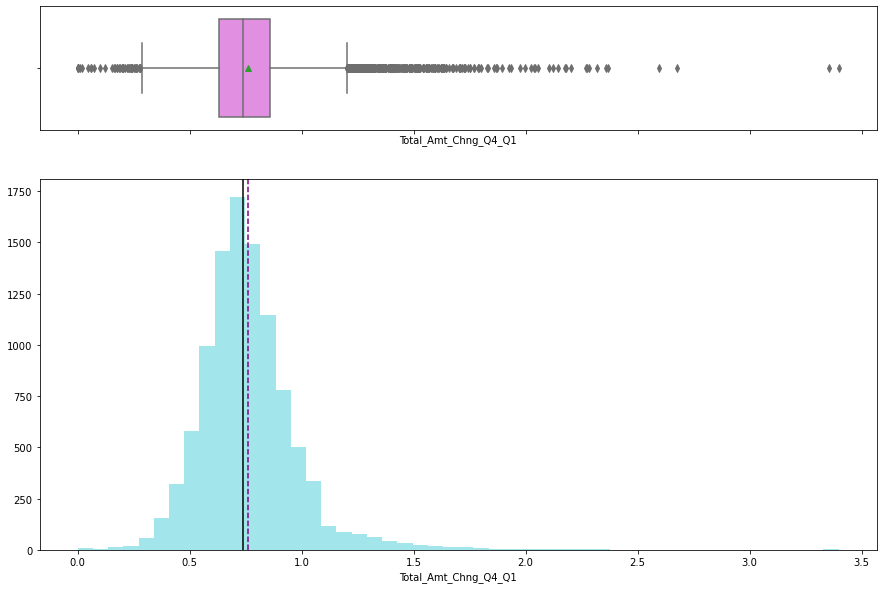

In [37]:
# Observation on Total_Amt_Chng_Q4_Q1: Normal distribution data ecxluding the outliers on either end
histogram_boxplot(data["Total_Amt_Chng_Q4_Q1"])

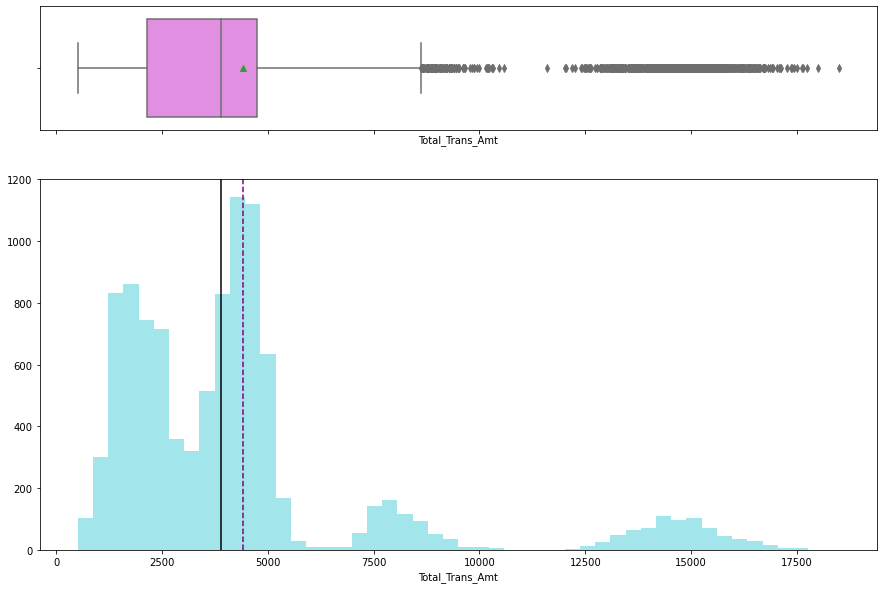

In [38]:
# Observation on Total_Trans_Amt: Slightly left skewed data,many outliers on the right
histogram_boxplot(data["Total_Trans_Amt"])

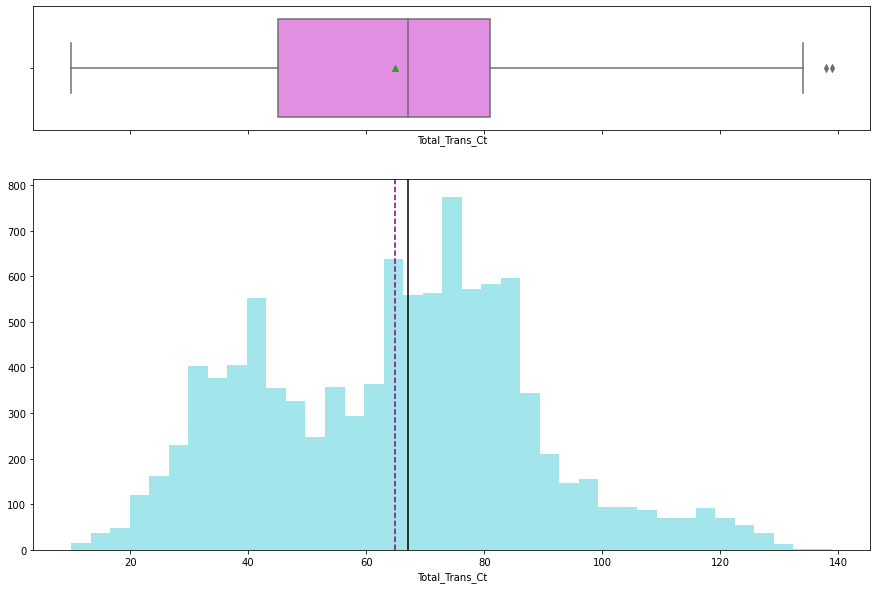

In [39]:
# Observation on Total_Trans_Ct: Slightly right skewed data, few outliers at the right end
histogram_boxplot(data["Total_Trans_Ct"])

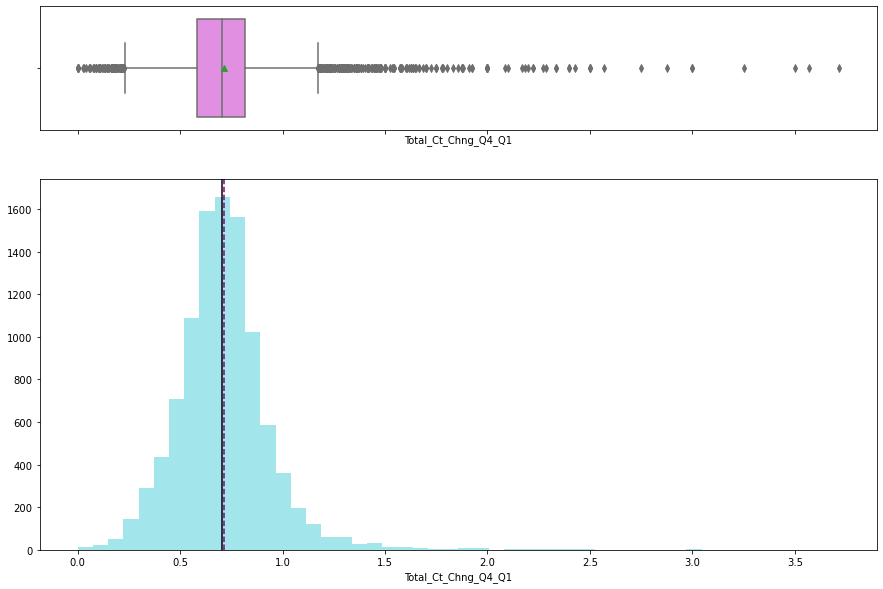

In [40]:
# Observation on Total_Ct_Chng_Q4_Q1: Normal distribution excluding the outliers
histogram_boxplot(data["Total_Ct_Chng_Q4_Q1"])

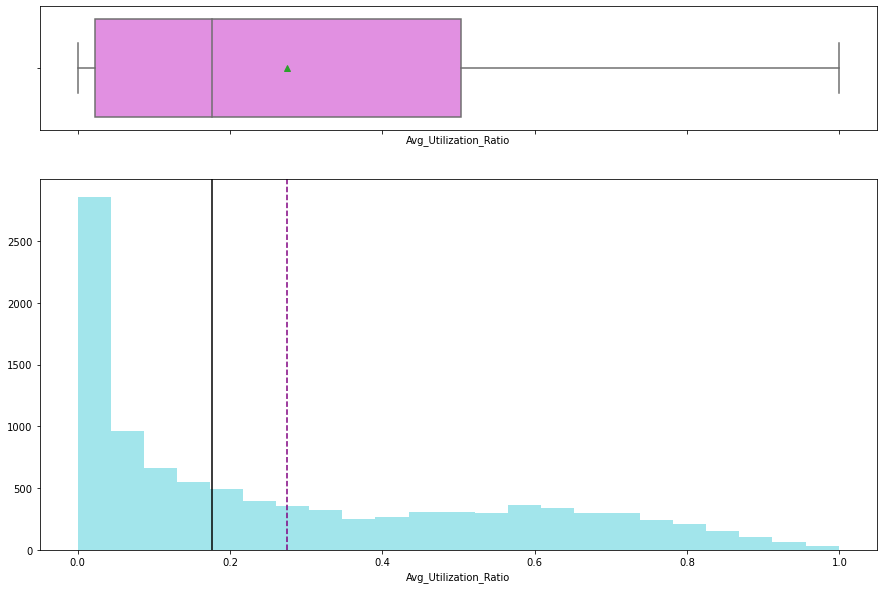

In [41]:
# Observation on Avg_Utilization_Ratio: Right skewed data
histogram_boxplot(data["Avg_Utilization_Ratio"])

In [42]:
# Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - 
# Any other exploratory deep dive

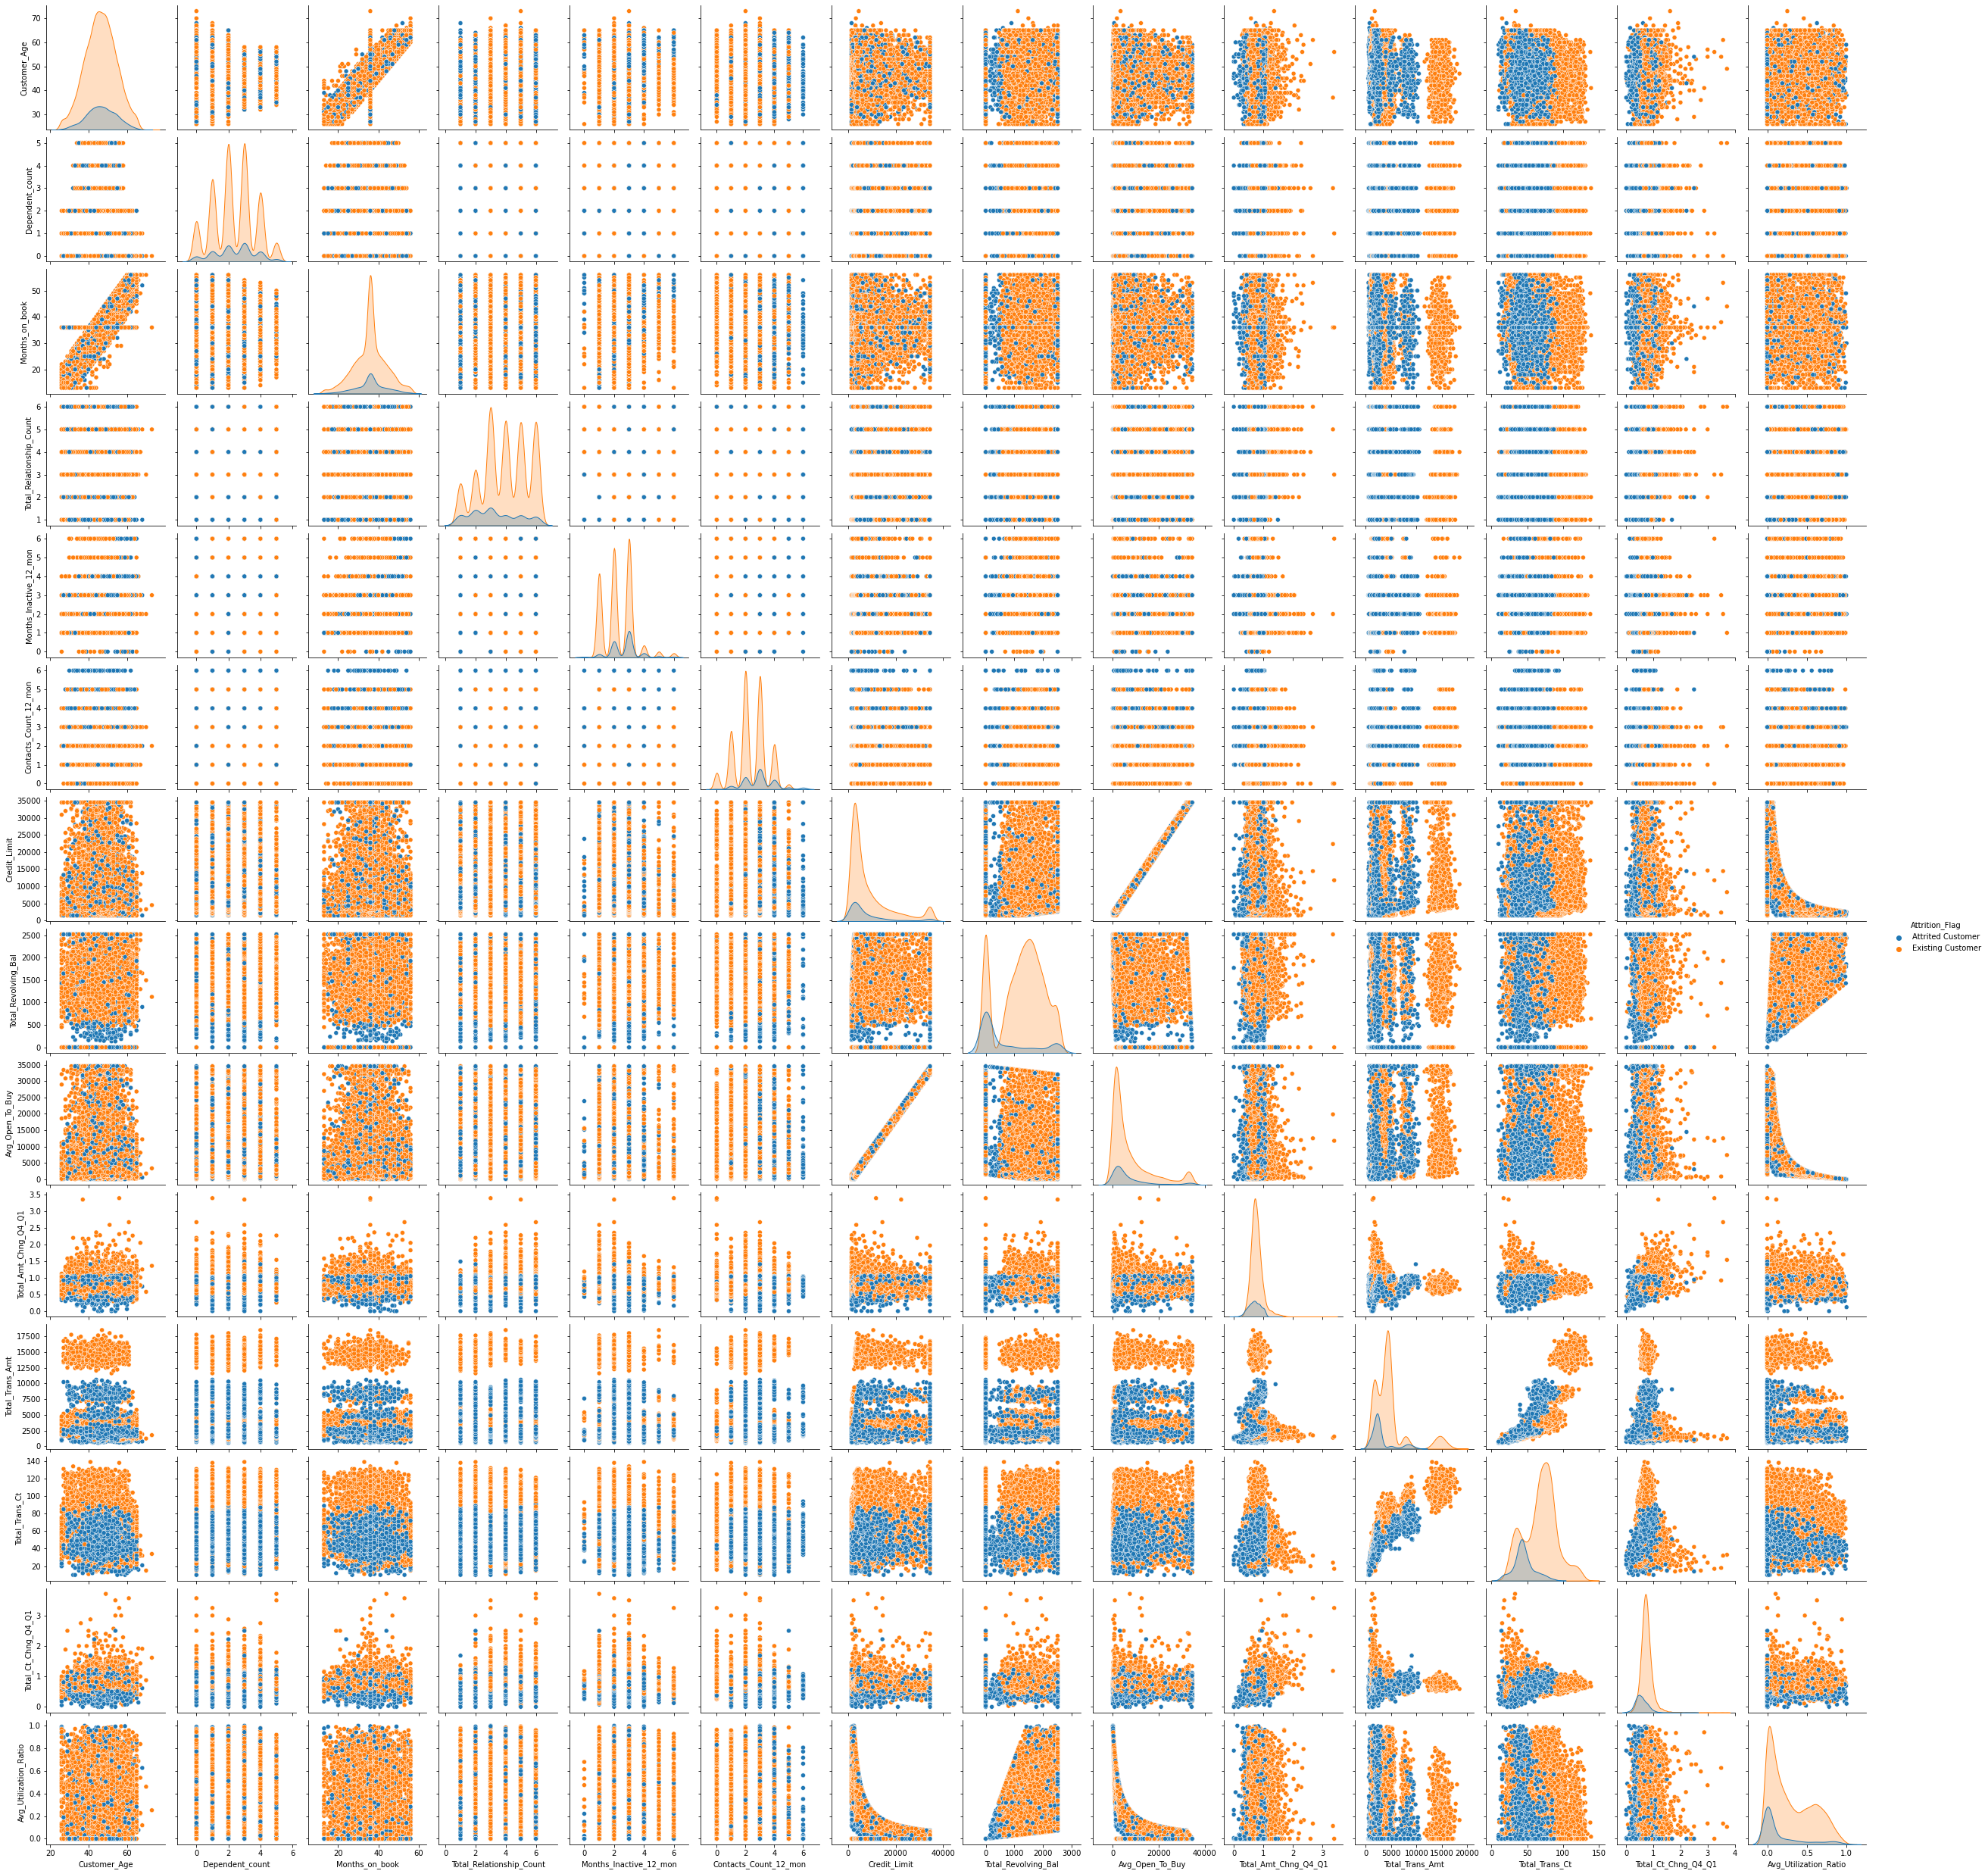

In [43]:
sns.pairplot(data, hue="Attrition_Flag")
# Observation: Customers with greater than 15000 Total_Trans_Amt  do not attrition.

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Customer_Age'>

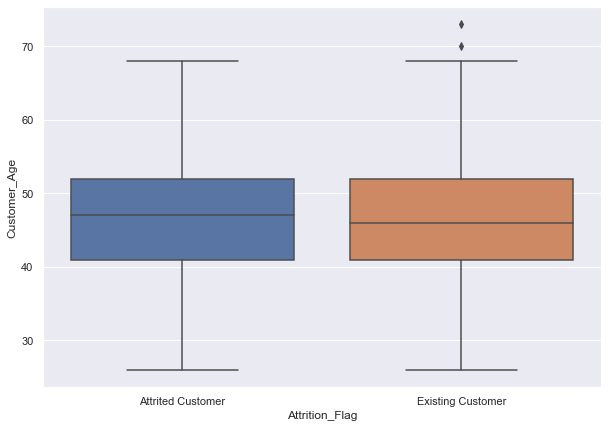

In [44]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Customer_Age", data=data, orient="vertical")

#Observation: Median age of existing custmoers is almost equal, only slightly less than the median age of attrited customer

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Dependent_count'>

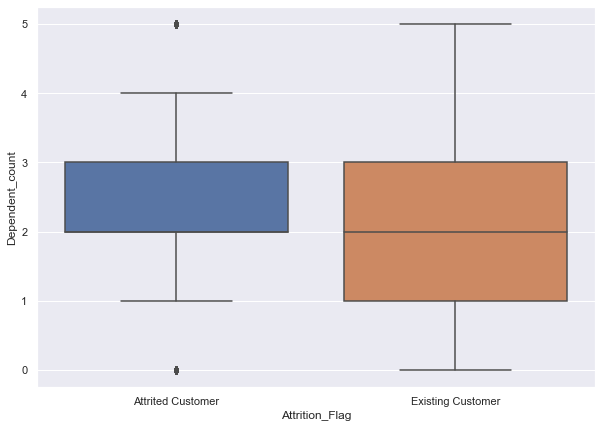

In [45]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Dependent_count", data=data, orient="vertical")
#Observation: The first quartile of existing customers is lower than attrited customers. So customers with less number
#of depenedents are likely to be existing customer

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_on_book'>

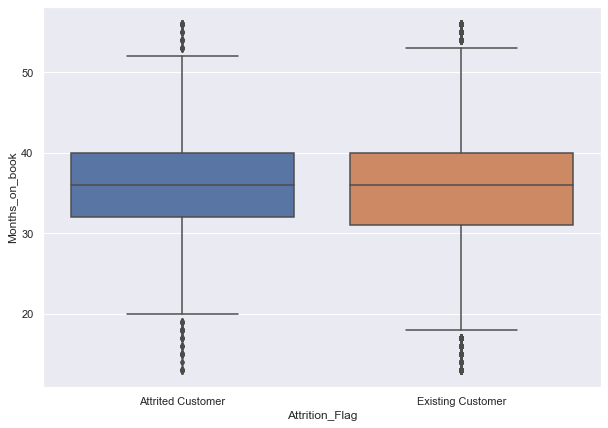

In [46]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_on_book", data=data, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Relationship_Count'>

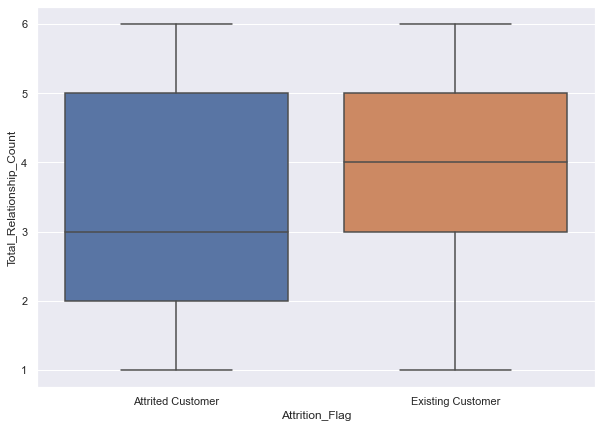

In [47]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Relationship_Count", data=data, orient="vertical")
# Observation: First quartile of Attrited customer is lower and hence customers with lower relationalship count are more 
# likely to attrition

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Months_Inactive_12_mon'>

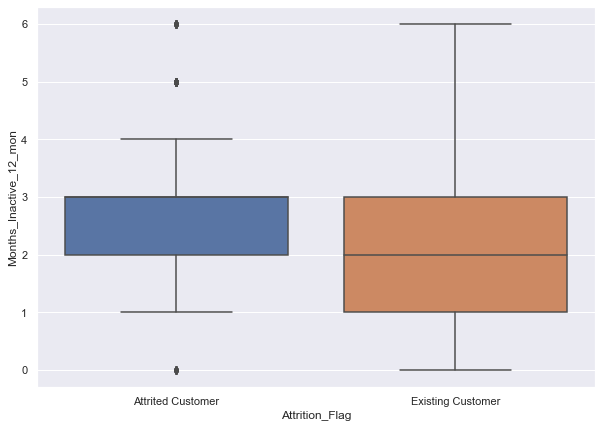

In [48]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Months_Inactive_12_mon", data=data, orient="vertical")
# Observation: First quartile of existing customer is lower and hence customers with lower months inactive in last 12 months 
# are more likely to remain as customers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Contacts_Count_12_mon'>

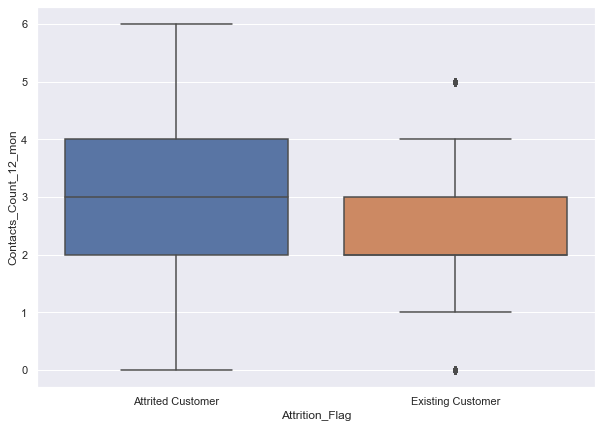

In [49]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Contacts_Count_12_mon", data=data, orient="vertical")
# Observation: Third quartile of attrited customer is higher and hence customers with higher counts of contact in last 12 months 
# are more likely to attrition

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Credit_Limit'>

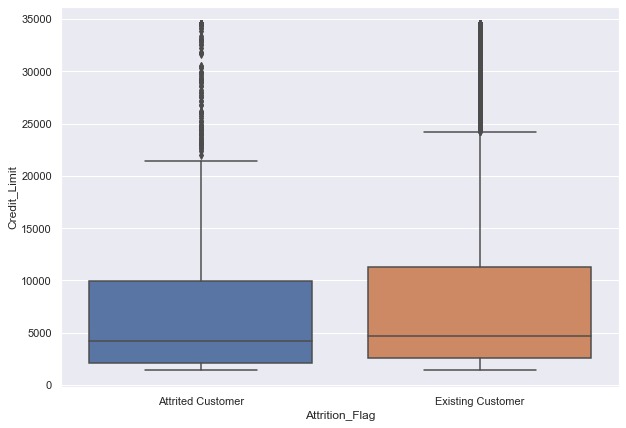

In [50]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=data, orient="vertical")
# Observation: Third quartile of existing customer is higher and hence customers with higher credit limit
# are more likely to remain as existing customer

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

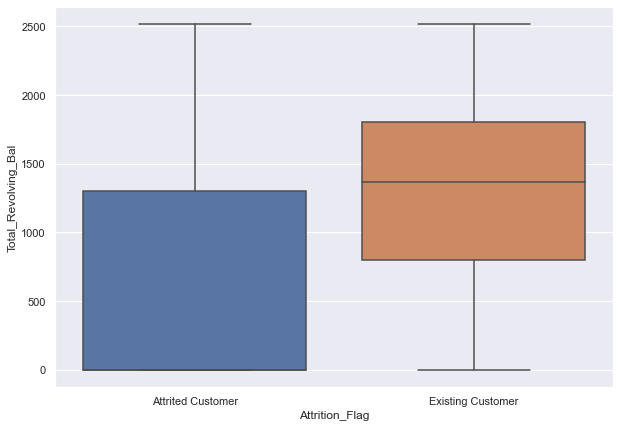

In [51]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=data, orient="vertical")
# Observation: First quartile of attrited customer is lower and hence customers with low total revolving balance 
# are more likely to attrition
# Third quartile of existing customer is higher and hence customers with high total revolving balance 
# are more likely to remain as existing customer

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Open_To_Buy'>

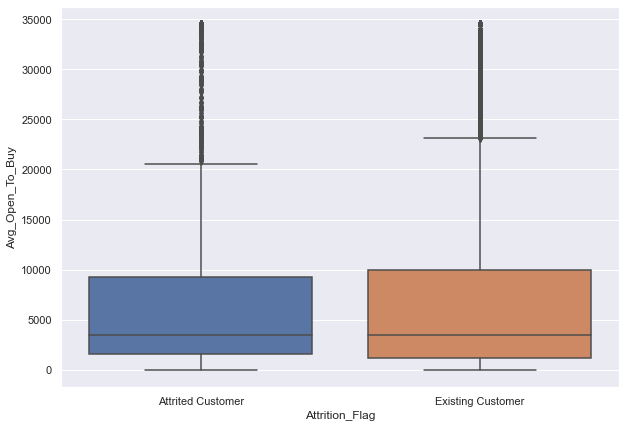

In [52]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=data, orient="vertical")

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Amt_Chng_Q4_Q1'>

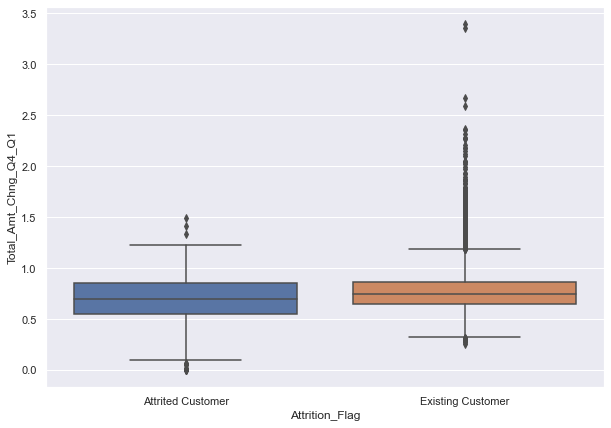

In [53]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=data, orient="vertical")
# Observation: First quartile of attrited customer is lower and hence customers with low total amt change between Q4-Q1
# are more likely to remain to attrition

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Amt'>

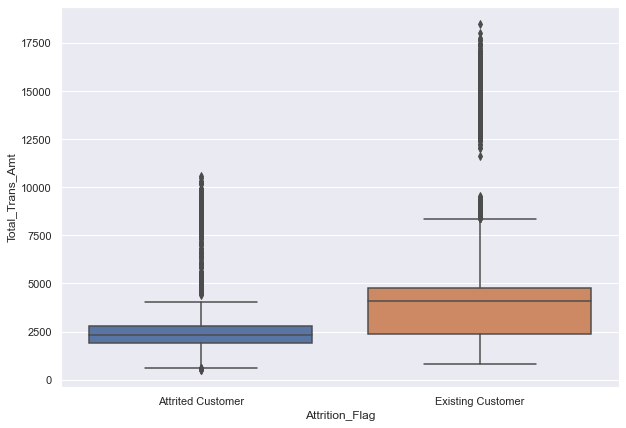

In [54]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=data, orient="vertical")
# Observation: Third quartile of existing customer is higher and hence customers with higher total transaction amnt
# are more likely to remain as existing customer
# First quartile of attrition customer is lower and hence customers with lower total transaction amt are more 
# likly to attrition

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Total_Trans_Ct'>

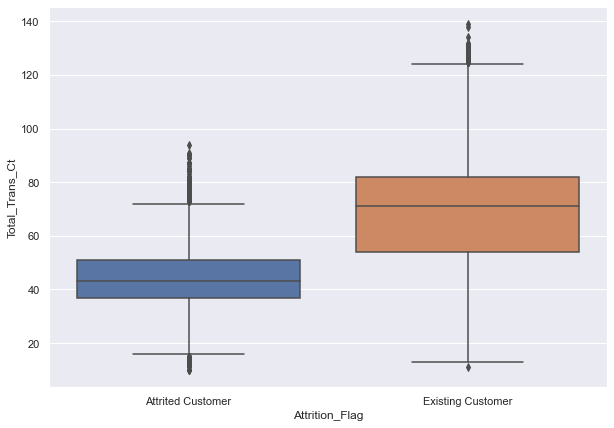

In [55]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=data, orient="vertical")
# Observation: Third quartile of existing customer is higher and hence customers with higher total transaction count
# are more likely to remain as existing customer
# First quartile of attrition customer is lower and hence customers with lower total transaction count are more 
# likly to attrition

<AxesSubplot:xlabel='Attrition_Flag', ylabel='Avg_Utilization_Ratio'>

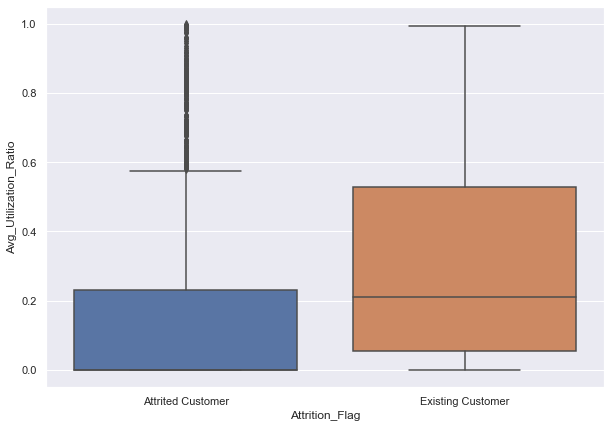

In [56]:
sns.set(rc={"figure.figsize": (10, 7)})
sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=data, orient="vertical")
# Observation: Third quartile of existing customer is higher and hence customers with higher avg utilization ratio
# are more likely to remain as existing customer
# First quartile of attrition customer is lower and hence customers with lower avg utilization ratio are more 
# likly to attrition

In [57]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set(palette="nipy_spectral")
    tab1 = pd.crosstab(x, data["Attrition_Flag"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, data["Attrition_Flag"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    # plt.legend(loc='lower left', frameon=False)
    # plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


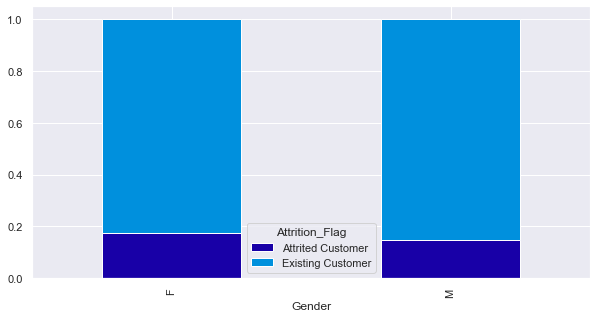

In [58]:
stacked_plot(data["Gender"])
#Observation: Male customers are more likely to reamin as existing customer and female are more likely to attrition

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


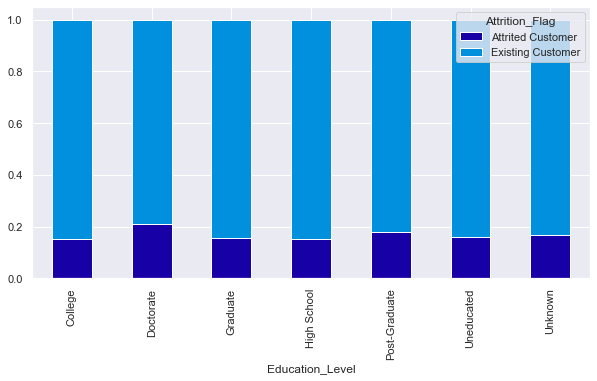

In [59]:
stacked_plot(data["Education_Level"])
#Observation: doctorate and post-graduate customers are more likely to attrition

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


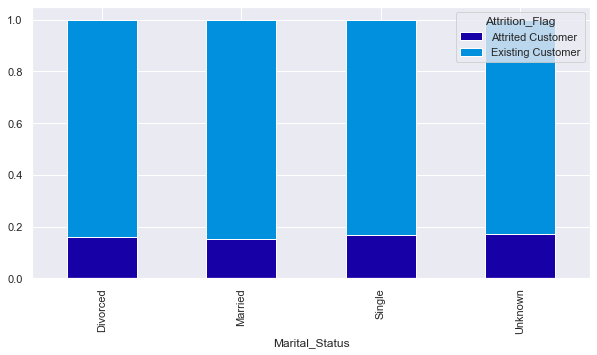

In [60]:
stacked_plot(data["Marital_Status"])
#Observation: Married customers are more likely to reman existing customer and single and cusotmer with unknown marital status
# are slightly more likely to attrition

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


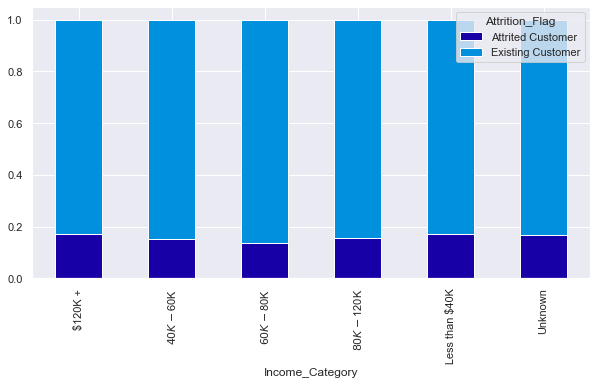

In [61]:
stacked_plot(data["Income_Category"])
#Observation: Customers making Less than 40k, 80-120K, 120K+ and unknnown salary are more likely to attrition.
# Cusotmers making 40-60k and 60-80k are more likely to remain as existing customers

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
------------------------------------------------------------------------------------------------------------------------


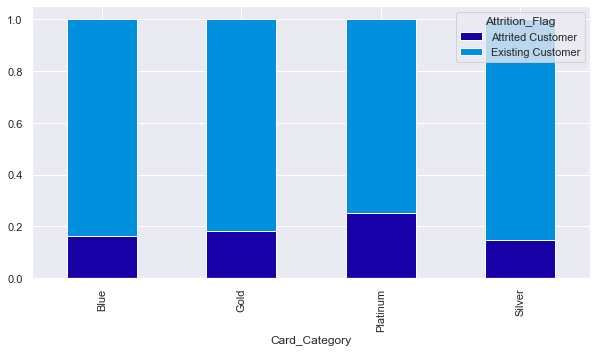

In [62]:
stacked_plot(data["Card_Category"])
#Observation: Cusotmers with platinum are more likely to attrition, followed by customers with gold card.

In [63]:
# Key Observations:
# Card category, Total transaction amt, Total transaction count, total revolving balance, total relationship count, 
# contact count in last 12 months seem to be good indicators of attrition customers

In [64]:
crosstab = pd.crosstab(data['Attrition_Flag'],data['Card_Category'])  # Contingency table of region and smoker attributes

Ho = "Attrition_Flag has no effect on Card_Category"   # Stating the Null Hypothesis
Ha = "Attrition_Flag has an effect on Card_Category"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Attrition_Flag has no effect on Card_Category as the p_value (0.525) > 0.05


In [65]:
crosstab = pd.crosstab(data['Attrition_Flag'],data['Total_Trans_Amt'])  # Contingency table of region and smoker attributes

Ho = "Attrition_Flag has no effect on Total transaction amt"   # Stating the Null Hypothesis
Ha = "Attrition_Flag has an effect on Total transaction amt"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Attrition_Flag has an effect on Total transaction amt as the p_value (0.0) < 0.05


In [66]:
crosstab = pd.crosstab(data['Attrition_Flag'],data['Total_Trans_Ct'])  # Contingency table of region and smoker attributes

Ho = "Attrition_Flag has no effect on Total_Trans_Ct"   # Stating the Null Hypothesis
Ha = "Attrition_Flag has an effect on Total_Trans_Ct"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Attrition_Flag has an effect on Total_Trans_Ct as the p_value (0.0) < 0.05


In [67]:
crosstab = pd.crosstab(data['Attrition_Flag'],data['Total_Revolving_Bal'])  # Contingency table of region and smoker attributes

Ho = "Attrition_Flag has no effect on Total_Revolving_Bal"   # Stating the Null Hypothesis
Ha = "Attrition_Flag has an effect on Total_Revolving_Bal"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Attrition_Flag has an effect on Total_Revolving_Bal as the p_value (0.0) < 0.05


In [68]:
crosstab = pd.crosstab(data['Attrition_Flag'],data['Total_Relationship_Count'])  # Contingency table of region and smoker attributes

Ho = "Attrition_Flag has no effect on Total_Relationship_Count"   # Stating the Null Hypothesis
Ha = "Attrition_Flag has an effect on Total_Relationship_Count"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Attrition_Flag has an effect on Total_Relationship_Count as the p_value (0.0) < 0.05


In [69]:
crosstab = pd.crosstab(data['Attrition_Flag'],data['Contacts_Count_12_mon'])  # Contingency table of region and smoker attributes

Ho = "Attrition_Flag has no effect on Contacts_Count_12_mon"   # Stating the Null Hypothesis
Ha = "Attrition_Flag has an effect on Contacts_Count_12_mon"   # Stating the Alternate Hypothesis

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Attrition_Flag has an effect on Contacts_Count_12_mon as the p_value (0.0) < 0.05


In [70]:
# Key Observations:

# Attrition flag has a high correlation with the following:

# Total transaction amt, 
# Total transaction count, 
# total revolving balance, 
# total relationship count, 
# Contacts_Count_12_mon

In [ ]:
# Model

# 2 types of losses:

# Identify an existing customer as attrition/will churn while he will not be atttirioned; False positive

# Identify an attrition/churn customer as existing/not churn; False negative; This is more costly.

# Cost of false negative is high, so we need to aim to reduce number of false negatives.
# We will use Recall as a metric of model evaluation


In [26]:
# Split data
X = data.drop(["Attrition_Flag"], axis=1)
y = data["Attrition_Flag"]

In [27]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
print(X_train.shape, X_test.shape)

(7088, 19) (3039, 19)


In [28]:
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal       

In [29]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

y_train = pd.get_dummies(data=y_train, drop_first=False)
y_test = pd.get_dummies(data=y_test, drop_first=False)



In [30]:
y_train=y_train.drop(['Existing Customer'], axis=1)
y_test=y_test.drop(['Existing Customer'], axis=1)

In [31]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list
models.append(
    (
        "LR",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("log_reg", LogisticRegression(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1)),
            ]
        ),
    )
)
models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=1)),
            ]
        ),
    )
)



In [32]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

LR: 59.172656310379466
RF: 76.38457376922483
GBM: 84.98802071257438
ADB: 83.23131617590232
[14:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learne

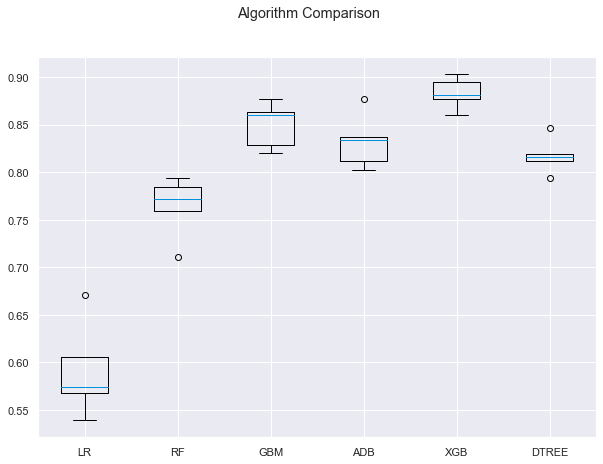

In [176]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure()

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

In [ ]:
# Observations:
# XGB and GBM are giving the highest cross validated recall 
# I will tune these three further to see performace can be improved

In [33]:
# Hyperparameter tuning

##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)

    score_list.extend(
        (
            train_acc,
            test_acc,
            train_recall,
            test_recall,
            train_precision,
            test_precision,
        )
    )

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print(
            "Precision on training set : ", metrics.precision_score(y_train, pred_train)
        )
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))

    return score_list  # returning the list with train and test scores

In [34]:
## Function to create confusion matrix
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(10, 7))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# TODO: # GBM : GridSearchCV

In [41]:

# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), GradientBoostingClassifier(random_state=1)
)


# Parameter grid to pass in GridSearchCV
param_grid = {
    "gradientboostingclassifier__n_estimators": np.arange(50, 300, 50),
    "gradientboostingclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gradientboostingclassifier__max_depth": [0, 1, 3, 5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 250} with CV score=0.8964332637761807:


In [39]:
#pipe.get_params().keys()

# dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'gradientboostingclassifier', 
#            'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 
#            'gradientboostingclassifier__ccp_alpha', 'gradientboostingclassifier__criterion', 
#            'gradientboostingclassifier__init', 'gradientboostingclassifier__learning_rate', 
#            'gradientboostingclassifier__loss', 'gradientboostingclassifier__max_depth', 
#            'gradientboostingclassifier__max_features', 'gradientboostingclassifier__max_leaf_nodes', 
#            'gradientboostingclassifier__min_impurity_decrease', 'gradientboostingclassifier__min_impurity_split',
#            'gradientboostingclassifier__min_samples_leaf', 'gradientboostingclassifier__min_samples_split', 
#            'gradientboostingclassifier__min_weight_fraction_leaf', 'gradientboostingclassifier__n_estimators', 
#            'gradientboostingclassifier__n_iter_no_change', 'gradientboostingclassifier__presort', 
#            'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', 
#            'gradientboostingclassifier__tol', 'gradientboostingclassifier__validation_fraction', 
#            'gradientboostingclassifier__verbose', 'gradientboostingclassifier__warm_start'])

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'gradientboostingclassifier', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'gradientboostingclassifier__ccp_alpha', 'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', 'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', 'gradientboostingclassifier__max_depth', 'gradientboostingclassifier__max_features', 'gradientboostingclassifier__max_leaf_nodes', 'gradientboostingclassifier__min_impurity_decrease', 'gradientboostingclassifier__min_impurity_split', 'gradientboostingclassifier__min_samples_leaf', 'gradientboostingclassifier__min_samples_split', 'gradientboostingclassifier__min_weight_fraction_leaf', 'gradientboostingclassifier__n_estimators', 'gradientboostingclassifier__n_iter_no_change', 'gradientboostingclassifier__presort', 'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', 'gradientboostingclassifier_

In [ ]:
# Output from above :Best parameters are {'gradientboostingclassifier__learning_rate': 0.2, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__n_estimators': 250} with CV score=0.8964332637761807:

In [42]:
# Creating new pipeline with best parameters
gbm_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        max_depth=3,
        learning_rate=0.2,
        n_estimators=250,
    ),
)

# Fit the model on training data
gbm_tuned1.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=250))])

Accuracy on training set :  0.9987302483069977
Accuracy on test set :  0.970714050674564
Recall on training set :  0.9947322212467077
Recall on test set :  0.8831967213114754
Precision on training set :  0.9973591549295775
Precision on test set :  0.9308855291576674


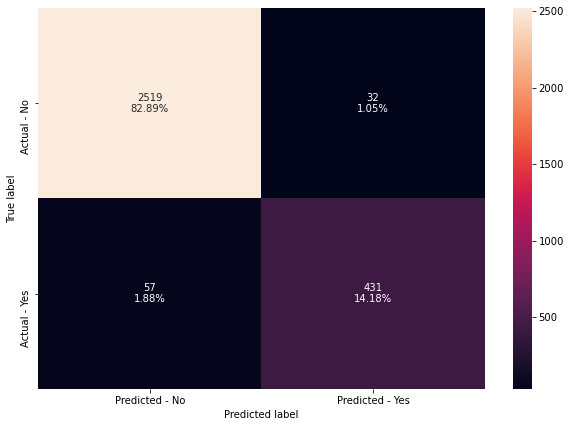

In [43]:
# Calculating different metrics
get_metrics_score(gbm_tuned1)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned1, y_test)

In [ ]:
# GBM: GridSearchCV
# The recall on test data is lower(0.88) to that of train data(0.99) which is not very desirable.
# The recall seems to be in the same range than that before we applied the GBM GridSearchCV

In [ ]:
# TODO
# GBM : RandomizedSearchCV

In [44]:
# GBM: RandomizedSearchCV
#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=1))

#Parameter grid to pass in 
param_grid = {
    "gradientboostingclassifier__n_estimators": np.arange(50, 300, 50),
    "gradientboostingclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "gradientboostingclassifier__max_depth": [0, 1, 3, 5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__learning_rate': 0.2} with CV score=0.8964332637761807:


In [ ]:
# Output from above :Best parameters are {'gradientboostingclassifier__n_estimators': 250, 'gradientboostingclassifier__max_depth': 3, 'gradientboostingclassifier__learning_rate': 0.2} with CV score=0.8964332637761807:

In [47]:
# Creating new pipeline with best parameters
gbm_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "GBM",
            GradientBoostingClassifier(
                n_estimators=250,
                learning_rate=0.2,
                max_depth=3,
            ),
        ),
    ]
)
# Fit the model on training data
gbm_tuned2.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('GBM',
                 GradientBoostingClassifier(learning_rate=0.2,
                                            n_estimators=250))])

Accuracy on training set :  0.9987302483069977
Accuracy on test set :  0.970714050674564
Recall on training set :  0.9947322212467077
Recall on test set :  0.8831967213114754
Precision on training set :  0.9973591549295775
Precision on test set :  0.9308855291576674


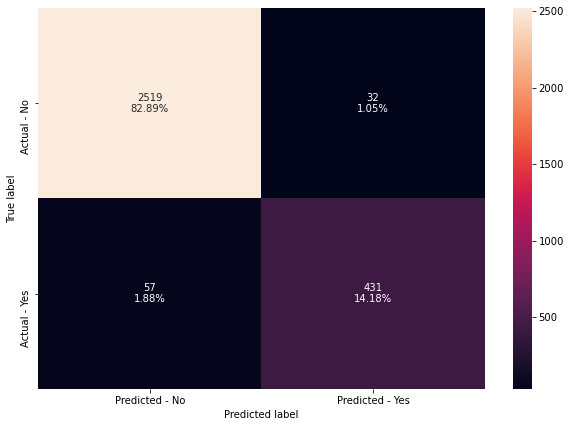

In [48]:
# Calculating different metrics
get_metrics_score(gbm_tuned2)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned2, y_test)

In [ ]:
# XGBoost: GridSearchCV

In [49]:

# Creating pipeline
pipe = make_pipeline(
    StandardScaler(), XGBClassifier(random_state=1, eval_metric="logloss")
)

# Parameter grid to pass in GridSearchCV
param_grid = {
    "xgbclassifier__n_estimators": np.arange(50, 300, 50),
    "xgbclassifier__scale_pos_weight": [0, 1, 2, 5, 10],
    "xgbclassifier__learning_rate": [0.01, 0.1, 0.2, 0.05],
    "xgbclassifier__gamma": [0, 1, 3, 5],
    "xgbclassifier__subsample": [0.7, 0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)


print(
    "Best parameters are {} with CV score={}:".format(
        grid_cv.best_params_, grid_cv.best_score_
    )
)

Best parameters are {'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} with CV score=0.951727335961048:


In [ ]:
# Output from above :

In [57]:

# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        n_estimators=50,
        scale_pos_weight=10,
        subsample=0.9,
        learning_rate=0.01,
        gamma=3,
    ),
)



In [58]:
# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

[16:28:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=3, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.01,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=16, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9201467268623025
Accuracy on test set :  0.9075353734781179
Recall on training set :  0.9885864793678666
Recall on test set :  0.944672131147541
Precision on training set :  0.6706372840976772
Precision on test set :  0.6447552447552447


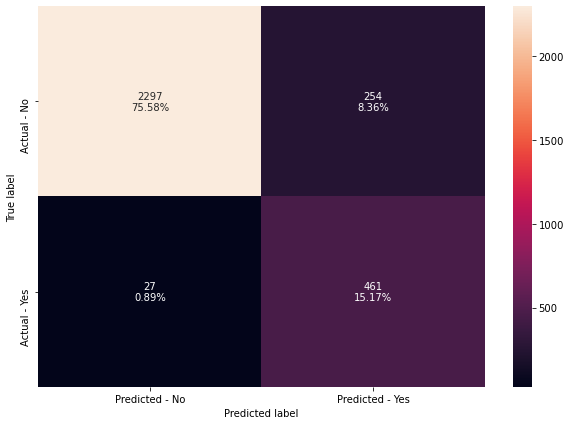

In [59]:
# Calculating different metrics
get_metrics_score(xgb_tuned1)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

In [ ]:
# XGBoost: GridSearchCV
# The recall on test data is close to that of train data which is good.
# The recall is higher than that before we applied the XGBoost GridSearchCV

In [133]:
# XGBoost: RandomizedSearchCV
#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1))

#Parameter grid to pass in 
param_grid={'xgbclassifier__n_estimators':np.arange(50,300,50),'xgbclassifier__scale_pos_weight':[0,1,2,5,10],
            'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05], 'xgbclassifier__gamma':[0,1,3,5],
            'xgbclassifier__subsample':[0.7,0.8,0.9,1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

[12:09:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:09:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:10:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:10:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:21] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:10:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:34] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:10:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:52] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:10:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:11:00] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:11:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:13] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:15] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:11:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[12:11:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:11:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [ ]:
# Output from above :


#Best parameters are {'xgbclassifier__subsample': 0.9, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__n_estimators': 200, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__gamma': 5} with CV score=0.9968061572820887:


In [50]:
# Creating new pipeline with best parameters
xgb_tuned2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        (
            "XGB",
            XGBClassifier(
                random_state=1,
                n_estimators=200,
                scale_pos_weight=10,
                learning_rate=0.05,
                gamma=5,
                subsample=0.9,
            ),
        ),
    ]
)
# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

[16:24:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('XGB',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=5, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=200,
                               n_jobs=16, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.9, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [ ]:
# the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

Accuracy on training set :  0.9860327313769752
Accuracy on test set :  0.9624876604146101
Recall on training set :  1.0
Recall on test set :  0.9405737704918032
Precision on training set :  0.9200323101777059
Precision on test set :  0.84375


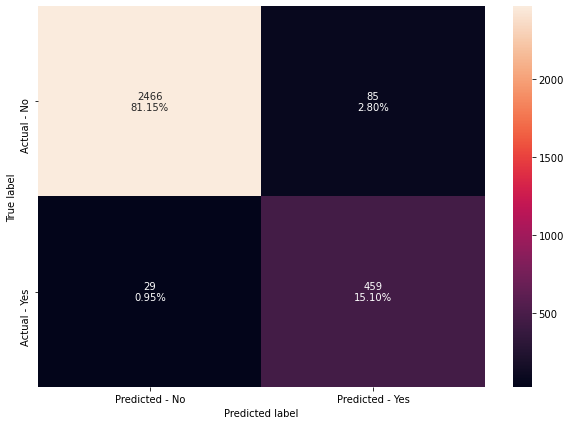

In [51]:
# Calculating different metrics
get_metrics_score(xgb_tuned2)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

In [ ]:
# XGBoost: RandomizedSearchCV
# The recall on test data is close to that of train data which is good.
# The recall is higher than that before we applied the XGBoost RandomizedSearchCV

In [60]:
## TODO
### Comparing the models
%%time

# defining list of models
#models = [xgb_tuned1, xgb_tuned2]
models = [xgb_tuned1, xgb_tuned2, gbm_tuned1, gbm_tuned2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [65]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGB GridSearchCV",
            "XGB RandSearchCV",
            "GBM GridSearchCV",
            "GBM RandSearchCV"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  Test_Recall  \
0  XGBGridSearchCV        0.920147       0.907535      0.988586     0.944672   
1  XGBRandSearchCV        0.986033       0.962488      1.000000     0.940574   
2  GBMGridSearchCV        0.998730       0.970714      0.994732     0.883197   
3  GBMRandSearchCV        0.998730       0.970714      0.994732     0.883197   

   Train_Precision  Test_Precision  
0         0.670637        0.644755  
1         0.920032        0.843750  
2         0.997359        0.930886  
3         0.997359        0.930886

In [ ]:
# Observations:
# XGBoost tuned with GridSeachCV is the best in terms of recall

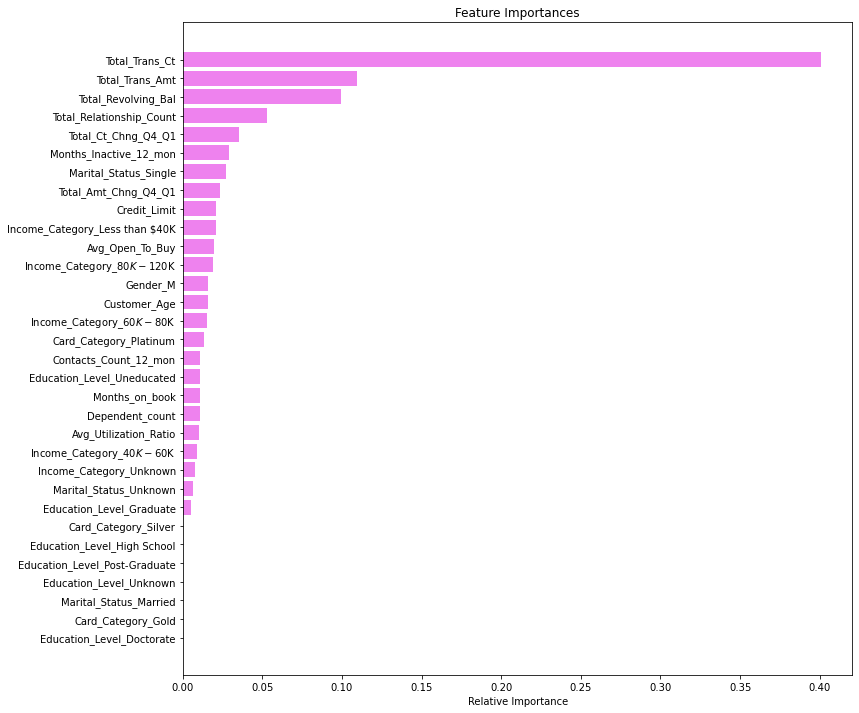

In [66]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Observations:
# Total Transaction Count is the most important variable to determine if the customer will churn/attrition
# Total Transaction Amount, Total Revolving balance are the next two important variables to indicate if the customer will churn